<a href="https://colab.research.google.com/github/Cayboss/Prediction-of-emp-attrition/blob/main/Prediction_of_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# importing data
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# making a copy
df = data.copy()

In [177]:
# checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no null values

In [178]:
# checking duplicate rows
df.duplicated().sum()

0

In [179]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There are no duplicate rows

**Exploratory Data Analysis**

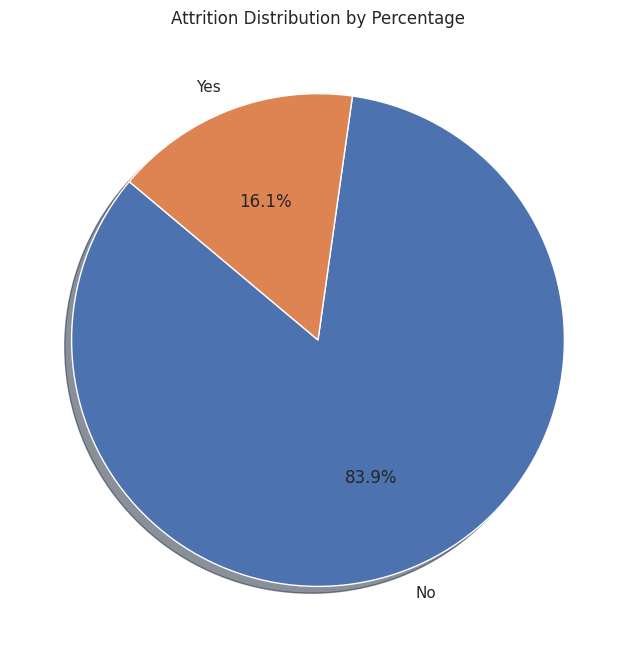

In [180]:
# Checking attrition distribution
category_counts = df['Attrition'].value_counts()
category_percentages = category_counts / category_counts.sum() * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_percentages, labels=category_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)

# Add a title
plt.title('Attrition Distribution by Percentage')
plt.show()

In [181]:
# checking cols value distribution
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

Cols'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful, so they have to be dropped.

In [182]:
# dropping the cols
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

**Categorical Columns**

In [183]:
# creating an array of all categorical datatypes
df_cat = df.select_dtypes(include = ['object'])
df_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


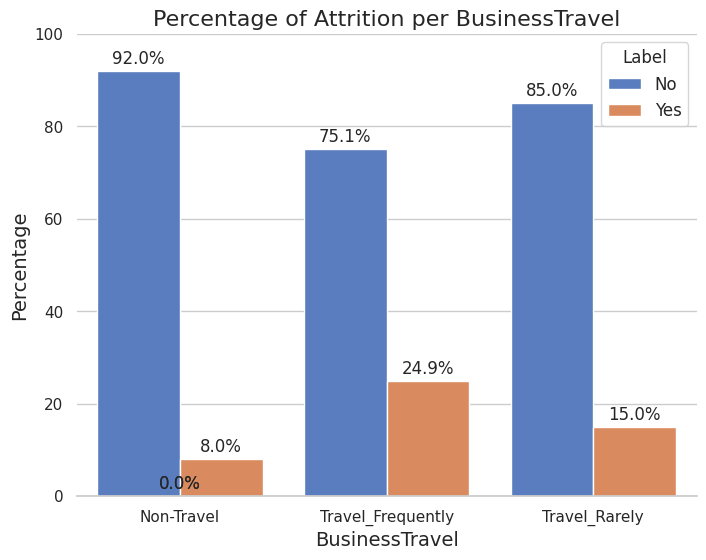

In [184]:
# plottting the percentage of attrition per businesstravel
grouped = df.groupby(['BusinessTravel', 'Attrition']).size().reset_index(name='Count')
total_counts = df.groupby('BusinessTravel').size().reset_index(name='Total')
grouped = pd.merge(grouped, total_counts, on='BusinessTravel')
grouped['Percentage'] = (grouped['Count'] / grouped['Total']) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='BusinessTravel', y='Percentage', hue='Attrition', data=grouped, palette='muted')
for p in barplot.patches:
    percentage = f'{p.get_height():.1f}%'
    barplot.annotate(percentage,
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.xlabel('BusinessTravel', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of Attrition per BusinessTravel', fontsize=16)
plt.ylim(0, 100)
plt.legend(title='Label', loc='upper right', fontsize=12)
sns.despine(left=True)

plt.show()

This plot shows that employees who travel the most are more likely to leave the company.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


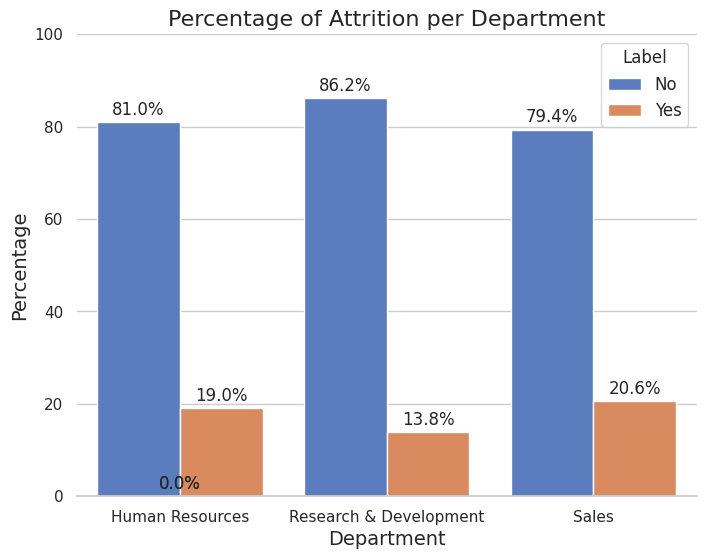

In [185]:
# plotting attrition per department
grouped = df.groupby(['Department', 'Attrition']).size().reset_index(name='Count')
total_counts = df.groupby('Department').size().reset_index(name='Total')
grouped = pd.merge(grouped, total_counts, on='Department')
grouped['Percentage'] = (grouped['Count'] / grouped['Total']) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Department', y='Percentage', hue='Attrition', data=grouped, palette='muted')
for p in barplot.patches:
    percentage = f'{p.get_height():.1f}%'
    barplot.annotate(percentage,
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.xlabel('Department', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of Attrition per Department', fontsize=16)
plt.ylim(0, 100)
plt.legend(title='Label', loc='upper right', fontsize=12)
sns.despine(left=True)

plt.show()

There is no much difference with departments


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


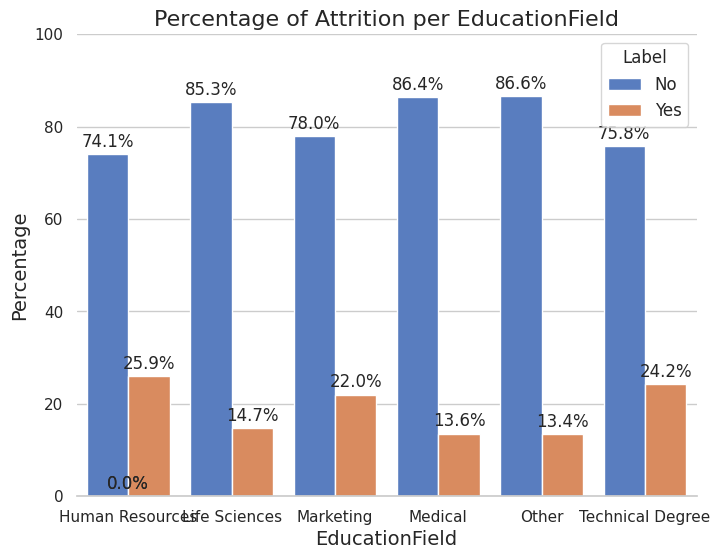

In [186]:
# percentage per education field
grouped = df.groupby(['EducationField', 'Attrition']).size().reset_index(name='Count')
total_counts = df.groupby('EducationField').size().reset_index(name='Total')
grouped = pd.merge(grouped, total_counts, on='EducationField')
grouped['Percentage'] = (grouped['Count'] / grouped['Total']) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='EducationField', y='Percentage', hue='Attrition', data=grouped, palette='muted')
for p in barplot.patches:
    percentage = f'{p.get_height():.1f}%'
    barplot.annotate(percentage,
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.xlabel('EducationField', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of Attrition per EducationField', fontsize=16)
plt.ylim(0, 100)
plt.legend(title='Label', loc='upper right', fontsize=12)
sns.despine(left=True)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


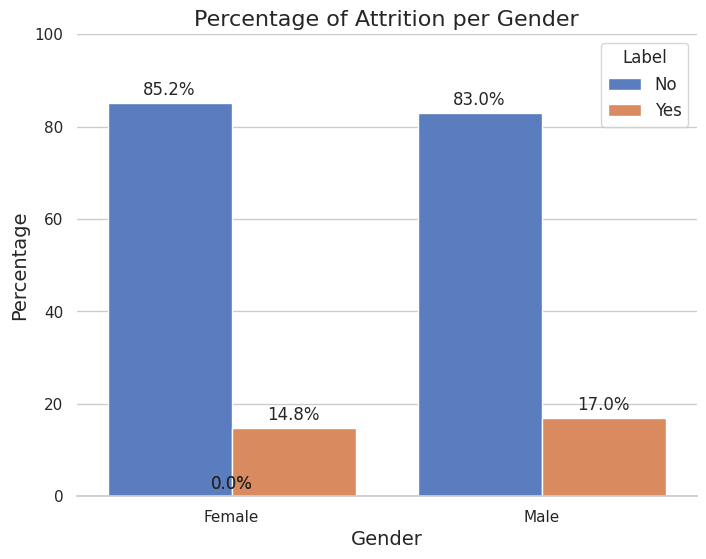

In [187]:
# percentage per gender
grouped = df.groupby(['Gender', 'Attrition']).size().reset_index(name='Count')
total_counts = df.groupby('Gender').size().reset_index(name='Total')
grouped = pd.merge(grouped, total_counts, on='Gender')
grouped['Percentage'] = (grouped['Count'] / grouped['Total']) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Gender', y='Percentage', hue='Attrition', data=grouped, palette='muted')
for p in barplot.patches:
    percentage = f'{p.get_height():.1f}%'
    barplot.annotate(percentage,
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of Attrition per Gender', fontsize=16)
plt.ylim(0, 100)
plt.legend(title='Label', loc='upper right', fontsize=12)
sns.despine(left=True)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


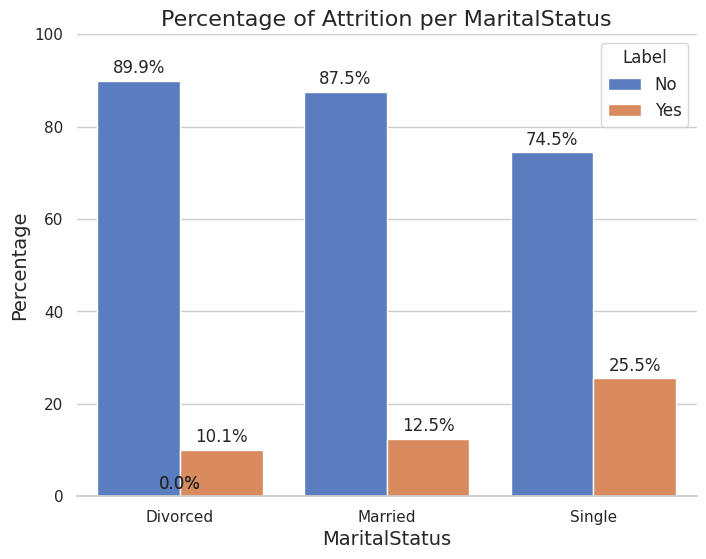

In [188]:
# percentage per marital status
grouped = df.groupby(['MaritalStatus', 'Attrition']).size().reset_index(name='Count')
total_counts = df.groupby('MaritalStatus').size().reset_index(name='Total')
grouped = pd.merge(grouped, total_counts, on='MaritalStatus')
grouped['Percentage'] = (grouped['Count'] / grouped['Total']) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='MaritalStatus', y='Percentage', hue='Attrition', data=grouped, palette='muted')
for p in barplot.patches:
    percentage = f'{p.get_height():.1f}%'
    barplot.annotate(percentage,
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.xlabel('MaritalStatus', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of Attrition per MaritalStatus', fontsize=16)
plt.ylim(0, 100)
plt.legend(title='Label', loc='upper right', fontsize=12)
sns.despine(left=True)

plt.show()

Singles are more likely to leave the company.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


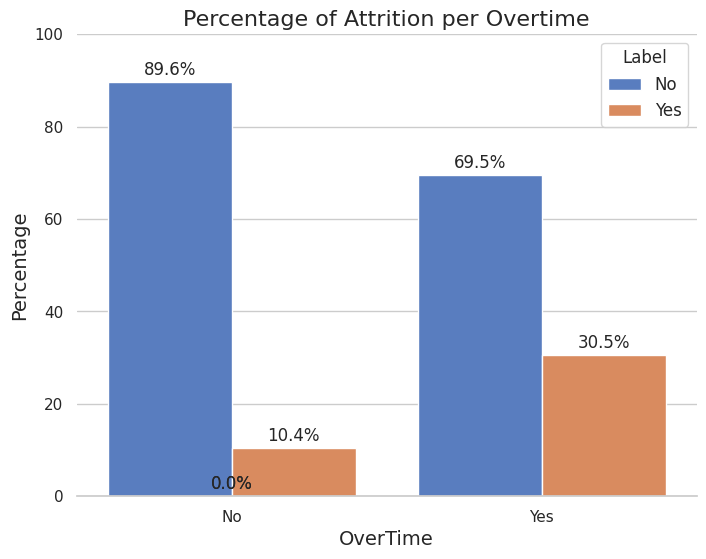

In [189]:
# percnetage per overtime
grouped = df.groupby(['OverTime', 'Attrition']).size().reset_index(name='Count')
total_counts = df.groupby('OverTime').size().reset_index(name='Total')
grouped = pd.merge(grouped, total_counts, on='OverTime')
grouped['Percentage'] = (grouped['Count'] / grouped['Total']) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='OverTime', y='Percentage', hue='Attrition', data=grouped, palette='muted')
for p in barplot.patches:
    percentage = f'{p.get_height():.1f}%'
    barplot.annotate(percentage,
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.xlabel('OverTime', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of Attrition per Overtime', fontsize=16)
plt.ylim(0, 100)
plt.legend(title='Label', loc='upper right', fontsize=12)
sns.despine(left=True)

plt.show()

Employees that work overtime are more likely to leave

**Numerical Columns**

In [190]:
# creating an array of all numerical cols
df_numeric = df.select_dtypes(exclude = ['object'])

In [191]:
df_numeric

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [192]:
# looking for outliers
def analyze_outliers(df):
    numerical_cols = df.select_dtypes(include='number').columns

    for col in numerical_cols:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        num_outliers = len(outliers)
        total_values = len(df[col])
        percentage_outliers = (num_outliers / total_values) * 100

        # Print number and percentage of outliers
        print(f"\nColumn: {col}")
        print(f"Number of outliers: {num_outliers}")
        print(f"Percentage of outliers: {percentage_outliers:.2f}%")

analyze_outliers(df_numeric)


Column: Age
Number of outliers: 0
Percentage of outliers: 0.00%

Column: DailyRate
Number of outliers: 0
Percentage of outliers: 0.00%

Column: DistanceFromHome
Number of outliers: 0
Percentage of outliers: 0.00%

Column: Education
Number of outliers: 0
Percentage of outliers: 0.00%

Column: EnvironmentSatisfaction
Number of outliers: 0
Percentage of outliers: 0.00%

Column: HourlyRate
Number of outliers: 0
Percentage of outliers: 0.00%

Column: JobInvolvement
Number of outliers: 0
Percentage of outliers: 0.00%

Column: JobLevel
Number of outliers: 0
Percentage of outliers: 0.00%

Column: JobSatisfaction
Number of outliers: 0
Percentage of outliers: 0.00%

Column: MonthlyIncome
Number of outliers: 114
Percentage of outliers: 7.76%

Column: MonthlyRate
Number of outliers: 0
Percentage of outliers: 0.00%

Column: NumCompaniesWorked
Number of outliers: 52
Percentage of outliers: 3.54%

Column: PercentSalaryHike
Number of outliers: 0
Percentage of outliers: 0.00%

Column: PerformanceRatin

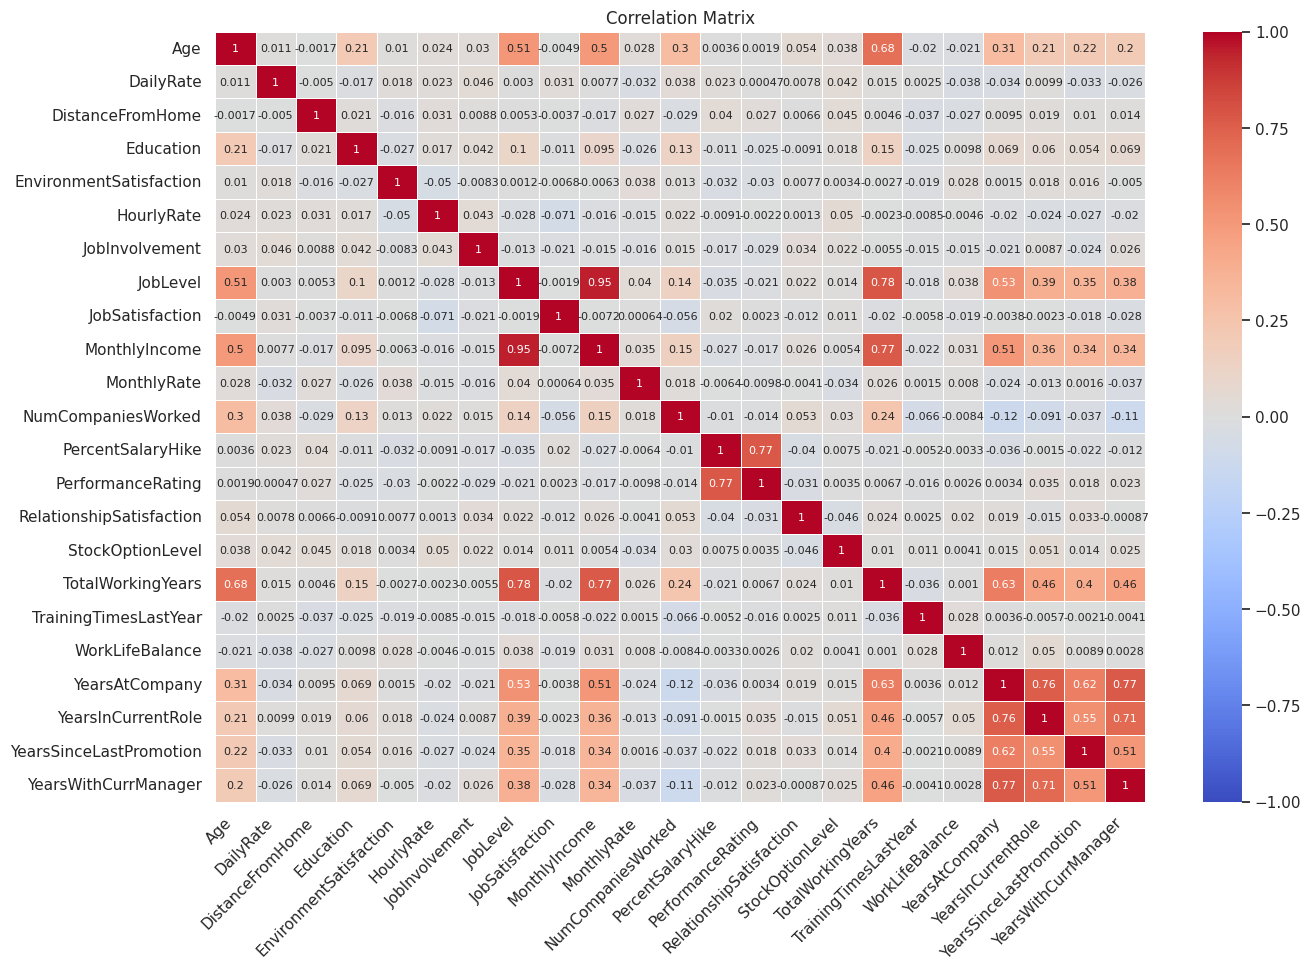

In [193]:
# looking at multicollinearity
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 8}, linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

There is a high correlation between the last 4 columns

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


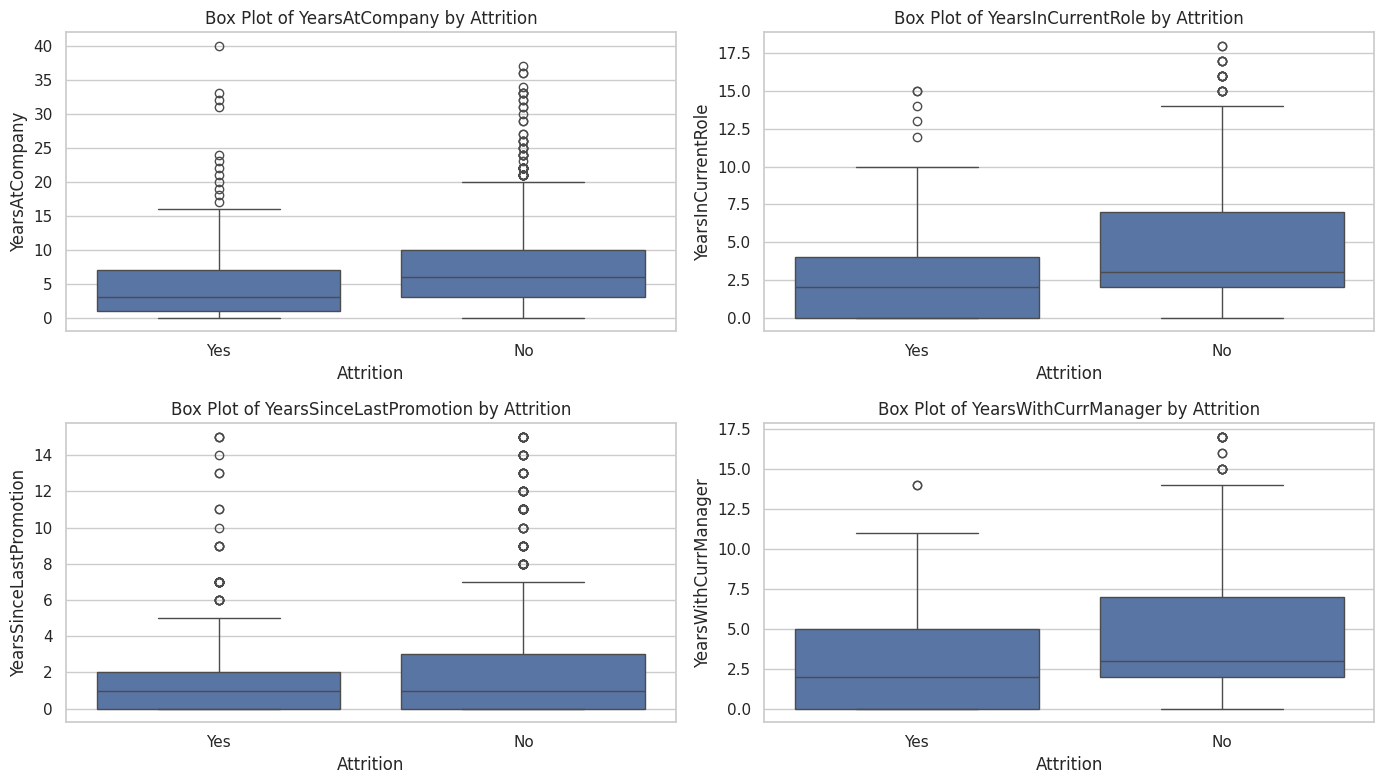

In [194]:
# looking at the relationship with the target col
numeric_columns = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']  # Replace with your numeric columns
target_column = 'Attrition'  # Replace with your target categorical column

plt.figure(figsize=(14, 8))

# Create subplots for each pair of columns
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=target_column, y=col, data=df)
    plt.title(f'Box Plot of {col} by {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

YearsInCurrentRole appears to share the biggest relationship with target column

In [195]:
# dropping the other cols
df_numeric.drop(['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] , axis = 1 , inplace = True)

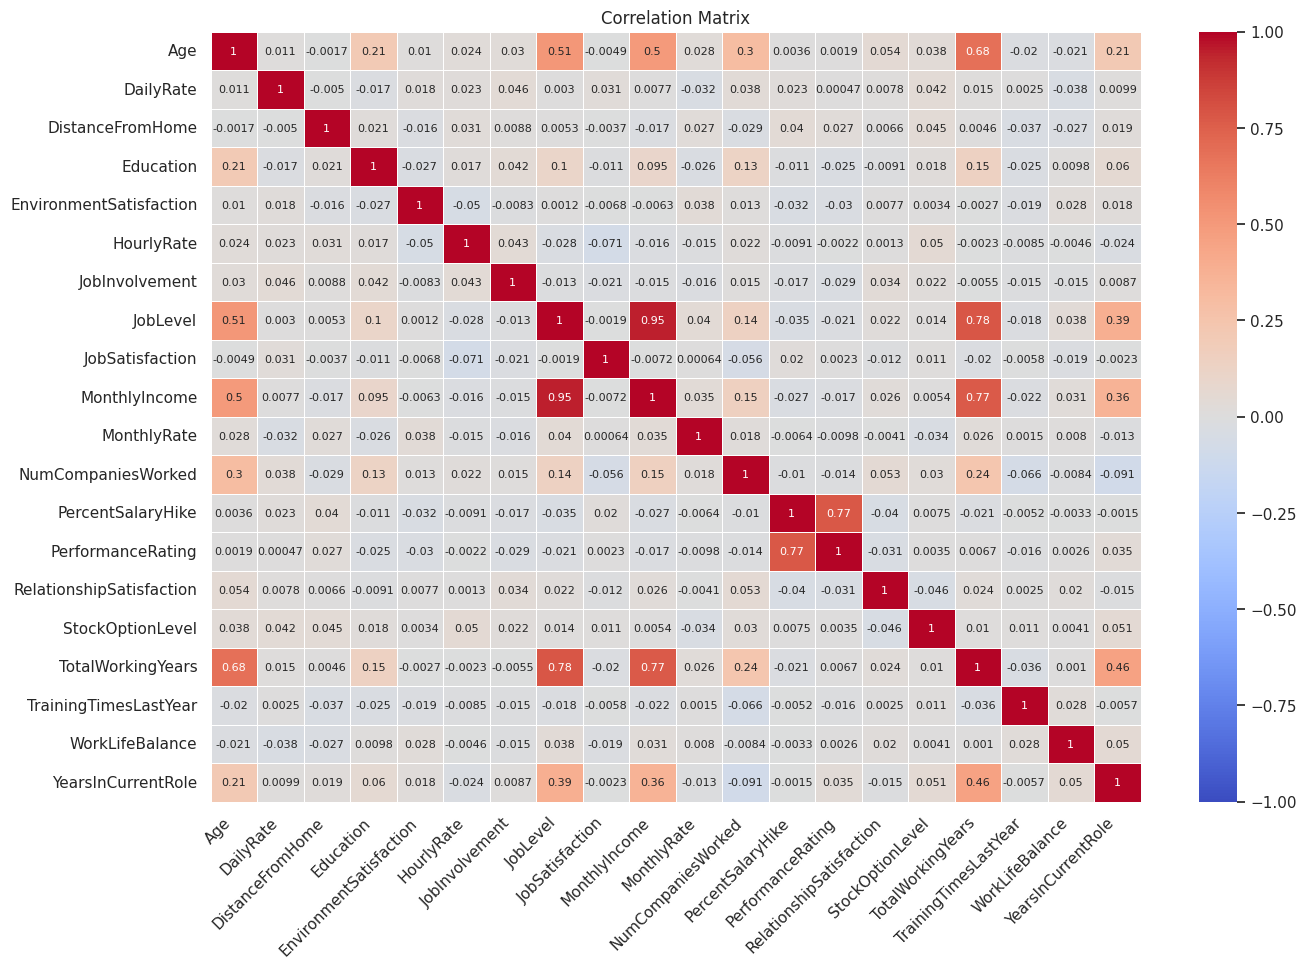

In [196]:
# plotting correlation matrix
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 8}, linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


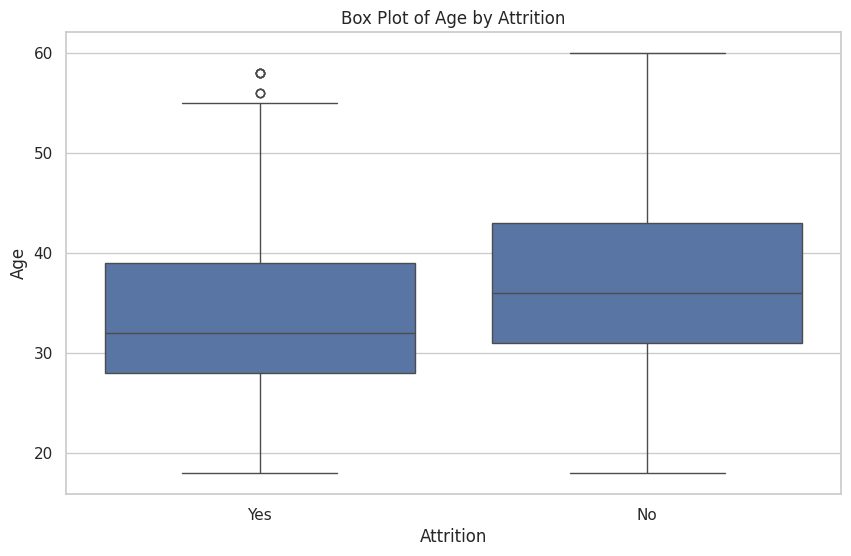

In [197]:
# plotting age distribution by attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Box Plot of Age by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


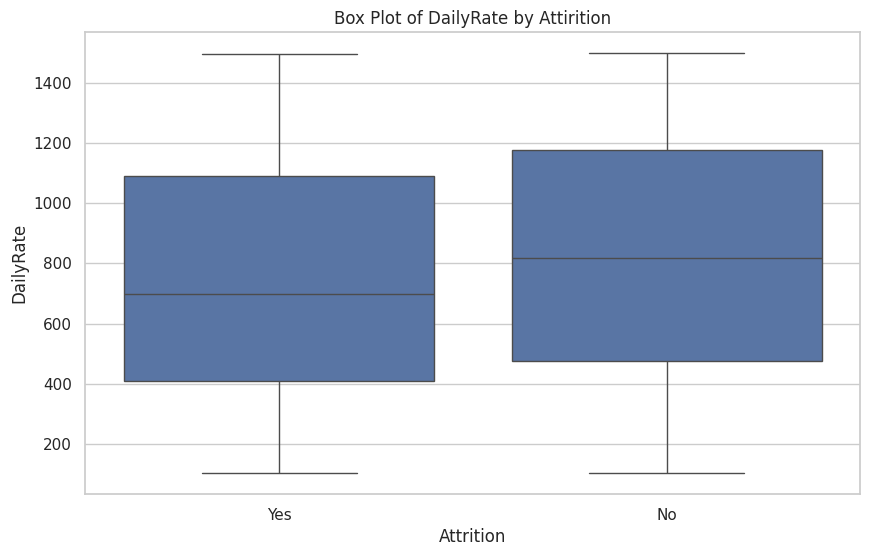

In [198]:
# plotting dailyrate distribution by attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DailyRate', data=df)
plt.title('Box Plot of DailyRate by Attirition')
plt.xlabel('Attrition')
plt.ylabel('DailyRate')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


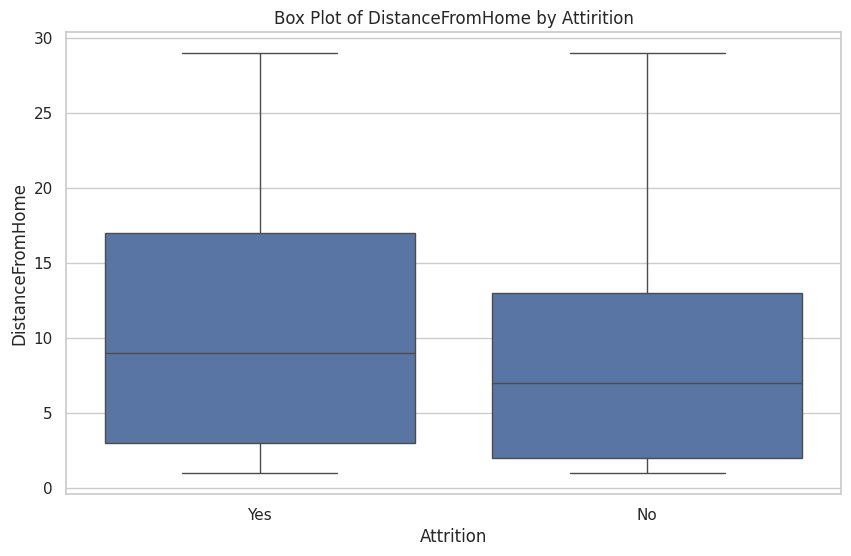

In [199]:
# plotting distancefromhome distribution by attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Box Plot of DistanceFromHome by Attirition')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


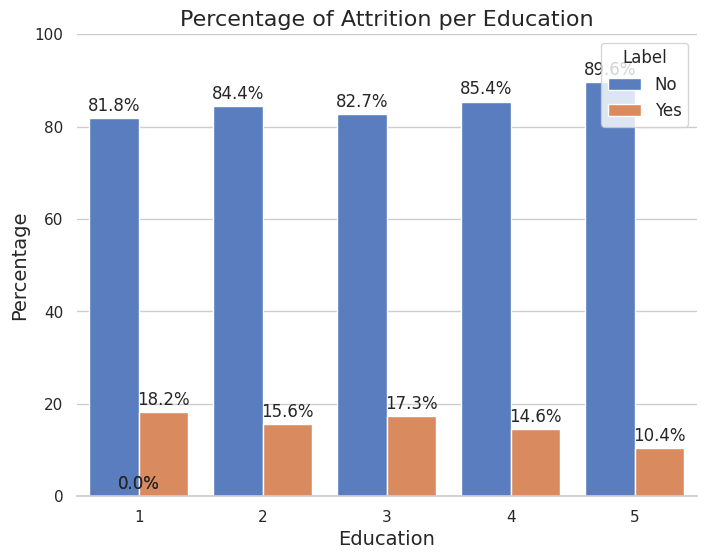

In [200]:
# percentage of attrition per education
grouped = df.groupby(['Education', 'Attrition']).size().reset_index(name='Count')
total_counts = df.groupby('Education').size().reset_index(name='Total')
grouped = pd.merge(grouped, total_counts, on='Education')
grouped['Percentage'] = (grouped['Count'] / grouped['Total']) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Education', y='Percentage', hue='Attrition', data=grouped, palette='muted')
for p in barplot.patches:
    percentage = f'{p.get_height():.1f}%'
    barplot.annotate(percentage,
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of Attrition per Education', fontsize=16)
plt.ylim(0, 100)
plt.legend(title='Label', loc='upper right', fontsize=12)
sns.despine(left=True)

plt.show()

**Data Preprocessing**

In [201]:
# One-hot encode the categorical variables
df_cat = df_cat.drop('Attrition', axis=1) #excluding target
df_encoded = pd.get_dummies(df_cat)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BusinessTravel_Non-Travel          1470 non-null   bool 
 1   BusinessTravel_Travel_Frequently   1470 non-null   bool 
 2   BusinessTravel_Travel_Rarely       1470 non-null   bool 
 3   Department_Human Resources         1470 non-null   bool 
 4   Department_Research & Development  1470 non-null   bool 
 5   Department_Sales                   1470 non-null   bool 
 6   EducationField_Human Resources     1470 non-null   bool 
 7   EducationField_Life Sciences       1470 non-null   bool 
 8   EducationField_Marketing           1470 non-null   bool 
 9   EducationField_Medical             1470 non-null   bool 
 10  EducationField_Other               1470 non-null   bool 
 11  EducationField_Technical Degree    1470 non-null   bool 
 12  Gender_Female       

In [202]:
# encoding the target variable 'Attrition'
df_encoded['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [203]:
# merge the numercal and cat cols
df_final = pd.concat([df_numeric, df_encoded], axis=1)

In [204]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [205]:
# check class balance for 'Attrition'
attrition_distribution = df_final['Attrition'].value_counts(normalize=True)
print("Attrition Distribution:\n", attrition_distribution)

Attrition Distribution:
 Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [206]:
from sklearn.model_selection import train_test_split

# splitting the data into features (X) and target (y)
x = df_final.drop('Attrition', axis=1)
y = df_final['Attrition']

In [207]:
# handling class imbalance(SMOTE)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

print(pd.Series(y).value_counts())

Attrition
1    1233
0    1233
Name: count, dtype: int64


In [211]:
# Train-test split (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [212]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Logistic Regression**

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# model selection
model = LogisticRegression(max_iter=5000)

# train the model
model.fit(x_train_scaled, y_train)

# model prediction
y_pred = model.predict(x_test_scaled)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.93
Confusion Matrix:
[[242   8]
 [ 26 218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       250
           1       0.96      0.89      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



In [214]:
from sklearn.neighbors import KNeighborsClassifier

# model selection
k = 3# number of neighbors
model = KNeighborsClassifier(n_neighbors=k)

# train the model
model.fit(x_train_scaled, y_train)

# model prediction
y_pred = model.predict(x_test_scaled)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.93
Confusion Matrix:
[[226  24]
 [ 13 231]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       250
           1       0.91      0.95      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



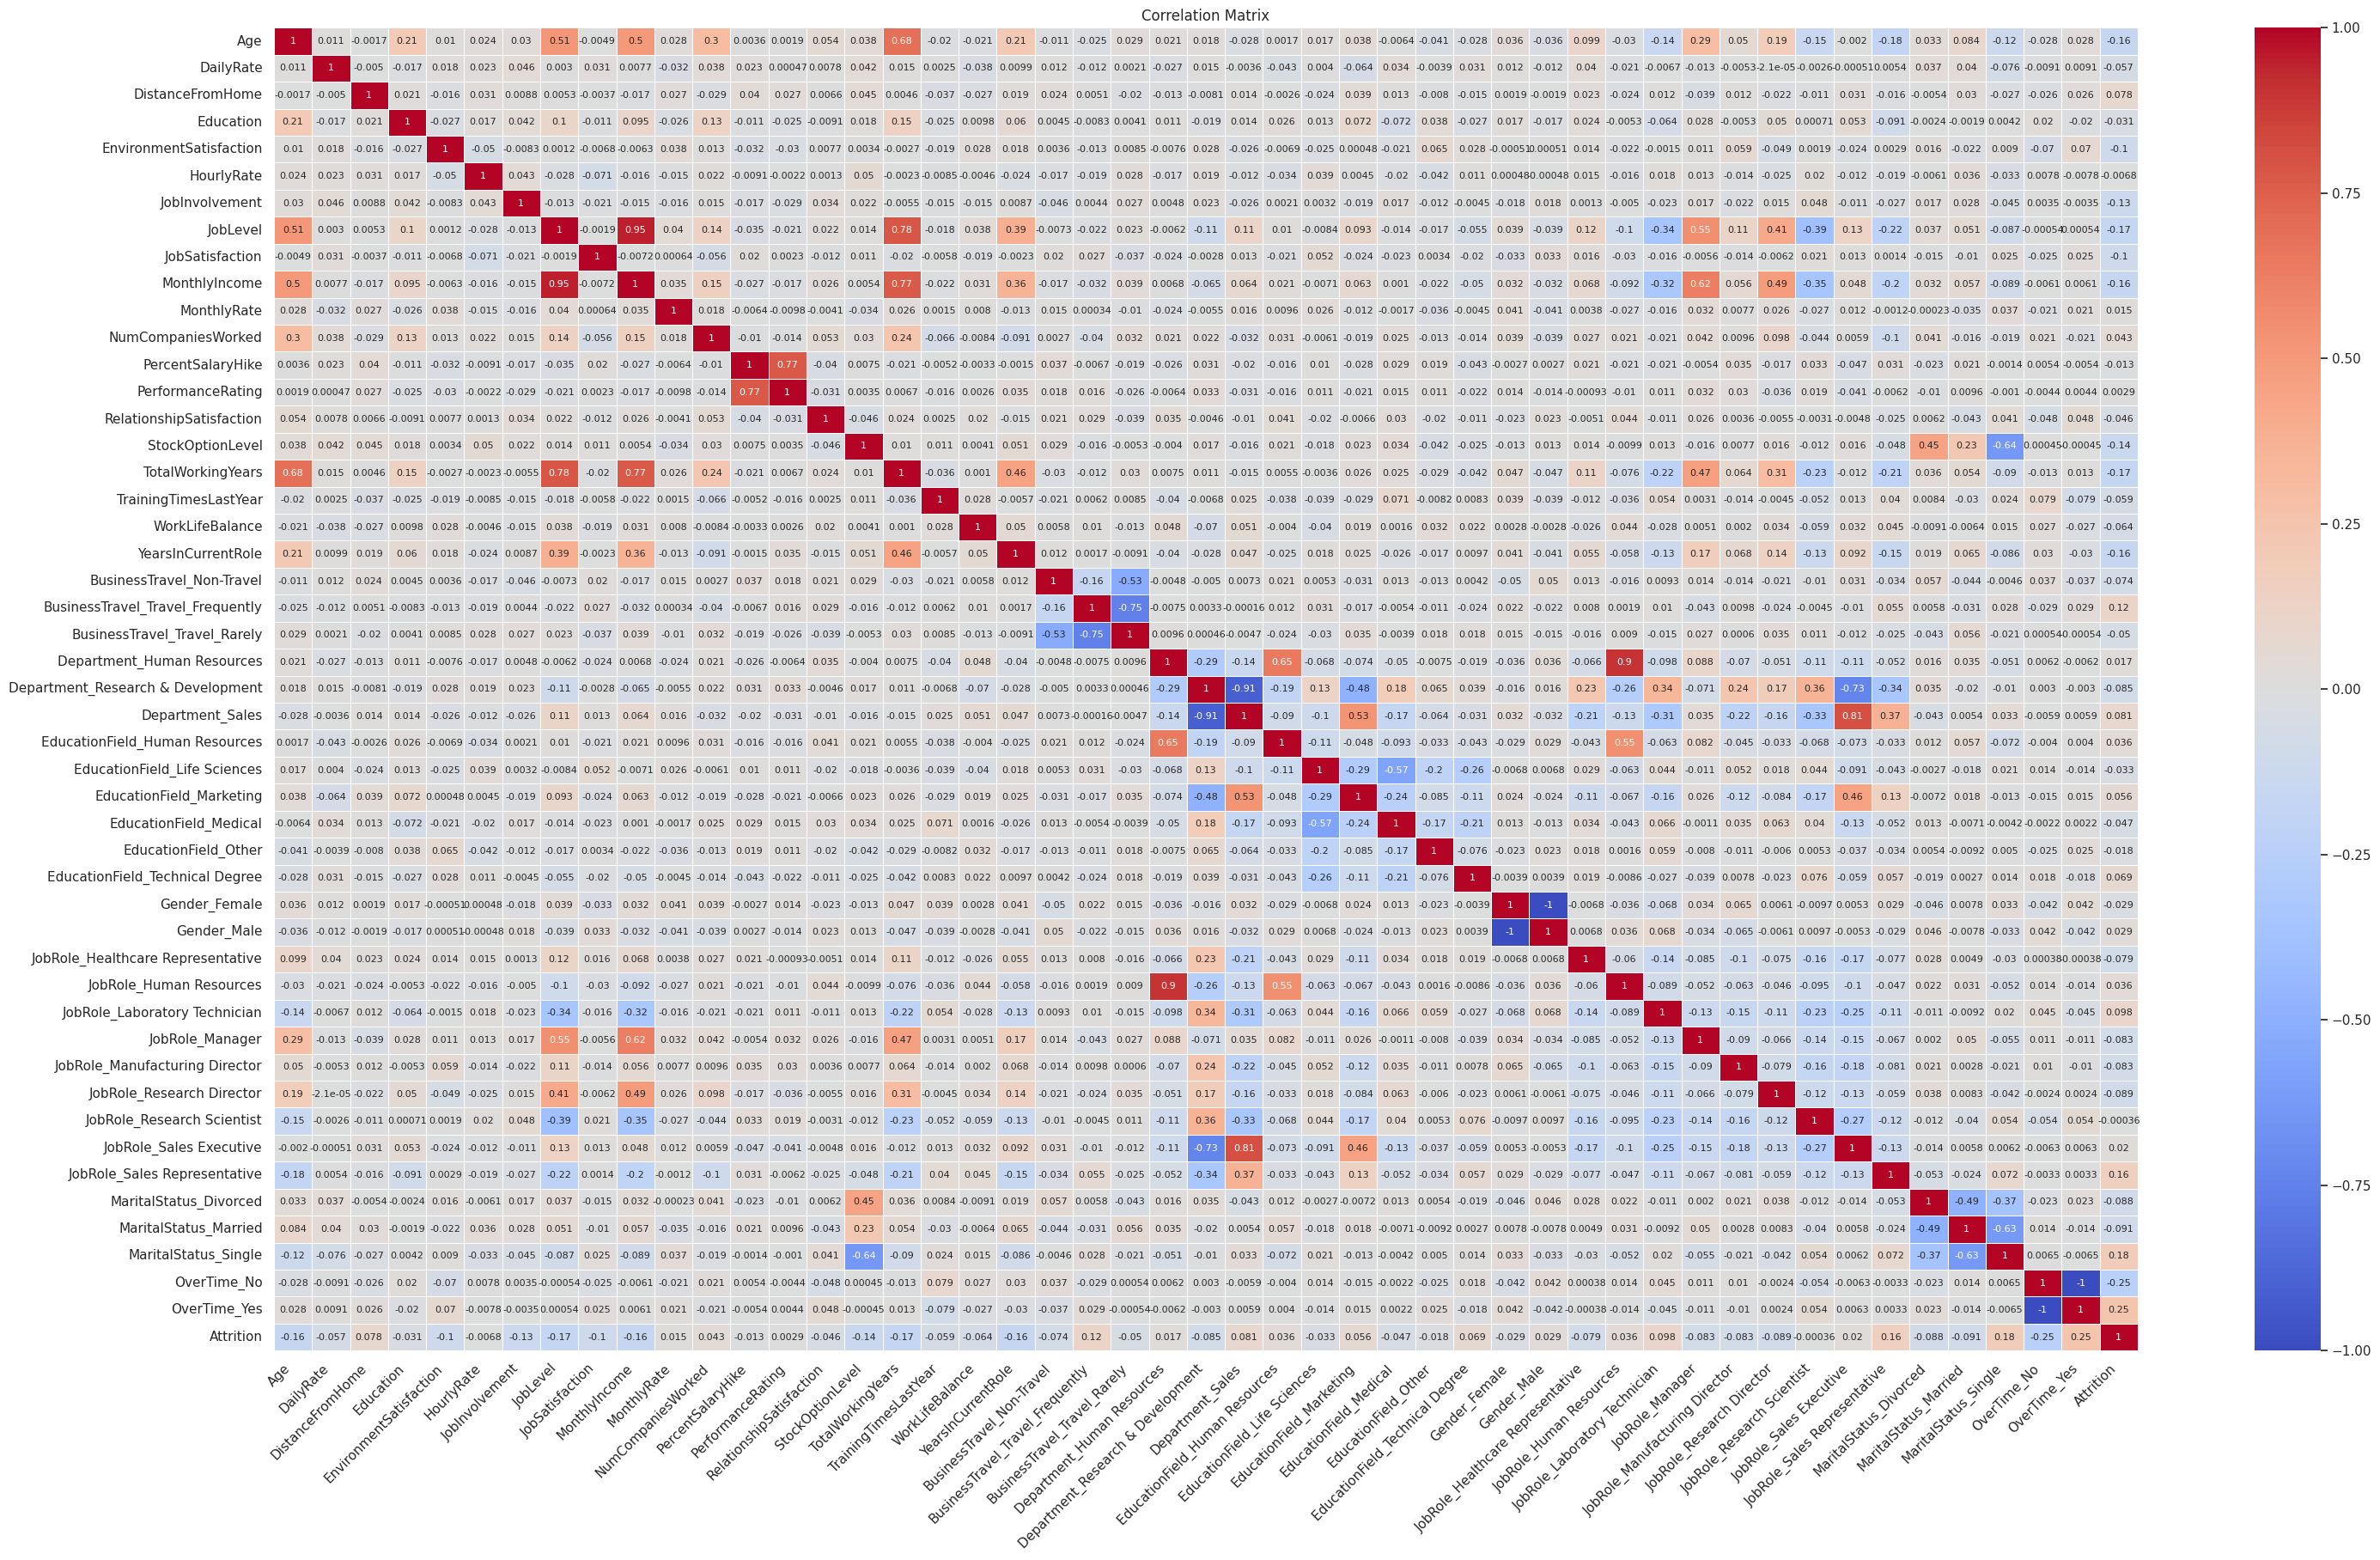

In [216]:
# correlation matrix
correlation_matrix = df_final.corr()

plt.figure(figsize=(35, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 8}, linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()